## Occupations

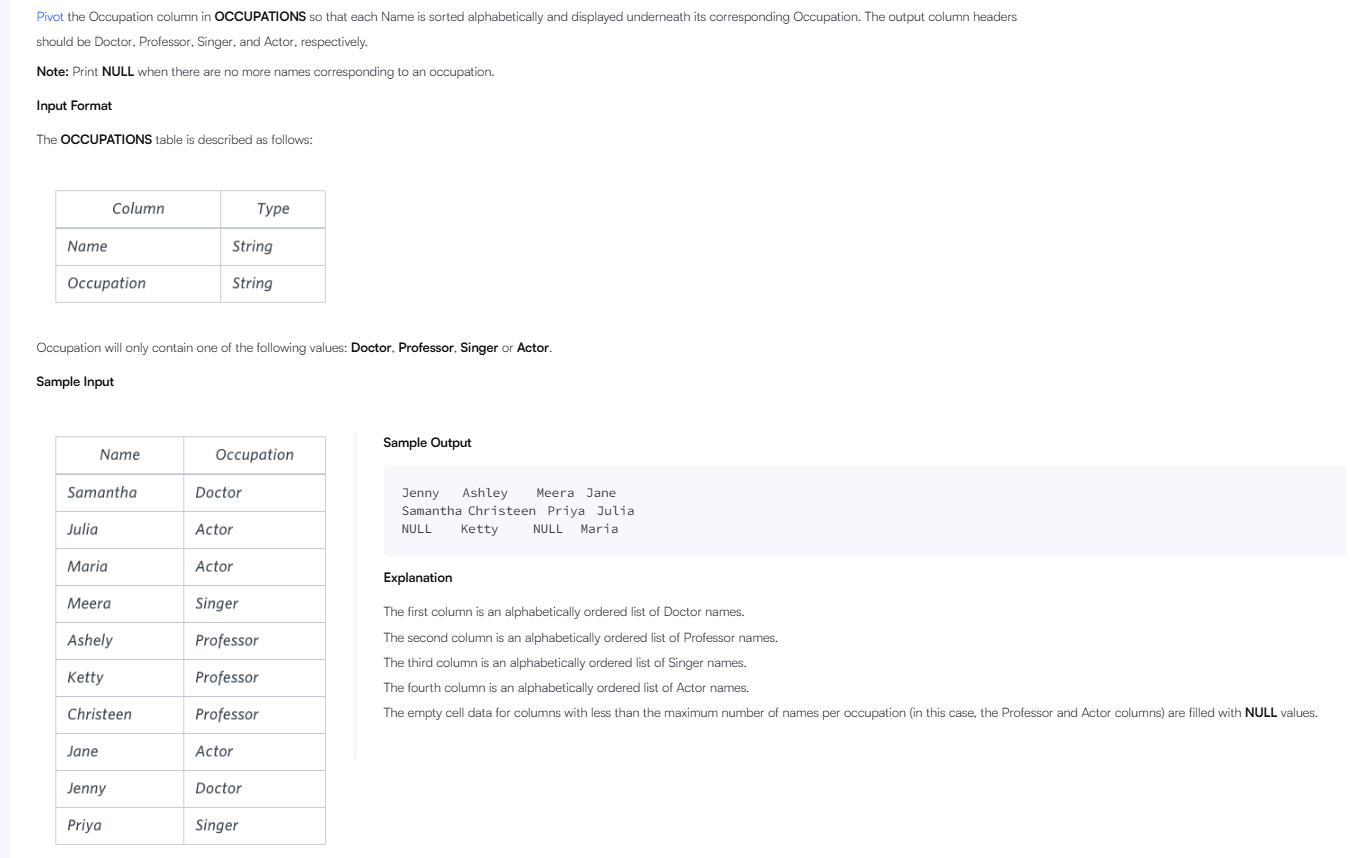

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType
from pyspark.sql.functions import col, row_number, when, max
from pyspark.sql.window import Window

In [0]:
spark = SparkSession.builder.appName("Occupations").getOrCreate()

In [0]:
occupations_schema = StructType([StructField('Name', StringType(), False), StructField('Occupation', StringType(), False)])

In [0]:
occupations_df = spark.read.csv('dbfs:/FileStore/HackerRank/Occupations.csv', schema=occupations_schema, header=True)

In [0]:
display(occupations_df)

Name,Occupation
Ashley,Professor
Samantha,Actor
Julia,Doctor
Britney,Professor
Maria,Professor
Meera,Professor
Priya,Doctor
Priyanka,Professor
Jennifer,Actor
Ketty,Actor


In [0]:
occupations_df.createOrReplaceTempView('occupations')

### Expected Output
Aamina Ashley  Christeen Eve \
Julia  Belvet  Jane     Jennifer \
Priya  Britney Jenny    Ketty \
NULL   Maria   Kristeen Samantha \
NULL   Meera   NULL     NULL \
NULL   Naomi   NULL     NULL \
NULL   Priyanka NULL    NULL

### SQL Solution

In [0]:
%sql
with PivotTable as ( select Name, occupation, row_number() over(PARTITION BY occupation order by name) as RowNum from occupations )
select Max(Case when occupation ='Doctor' then Name end) as Doctor, 
       Max(Case when occupation ='Professor' then Name end) as Professor, 
       Max(Case when occupation ='Singer' then Name end) as Singer, 
       Max(Case when occupation ='Actor' then Name end) as Actor from 
PivotTable group by RowNum

Doctor,Professor,Singer,Actor
Aamina,Ashley,Christeen,Eve
Julia,Belvet,Jane,Jennifer
Priya,Britney,Jenny,Ketty
null,Maria,Kristeen,Samantha
null,Meera,null,null
null,Naomi,null,null
null,Priyanka,null,null


### Pyspark Solution

In [0]:
pivot_table_df = occupations_df.withColumn('rownum', row_number().over(Window.partitionBy(col('occupation')).orderBy(col('name'))))

result_df = pivot_table_df.withColumn('Doctor', when(col('occupation') == 'Doctor', col('name')))\
  .withColumn('Professor', when(col('occupation') == 'Professor', col('name')))\
    .withColumn('Singer', when(col('occupation') == 'Singer', col('name')))\
      .withColumn('Actor', when(col('occupation') == 'Actor', col('name')))\
        .groupBy(col('rownum'))\
          .agg(max(col('Doctor')).alias('Doctor'), max(col('Professor')).alias('Professor'), max(col('Singer')).alias('Singer'), max(col('Actor')).alias('Actor'))\
            .select(col('Doctor'), col('Professor'), col('Singer'), col('Actor'))

display(result_df)

Doctor,Professor,Singer,Actor
Aamina,Ashley,Christeen,Eve
Julia,Belvet,Jane,Jennifer
Priya,Britney,Jenny,Ketty
null,Maria,Kristeen,Samantha
null,Meera,null,null
null,Naomi,null,null
null,Priyanka,null,null
